<a href="https://colab.research.google.com/github/waseem39/Bifurcation-Application/blob/main/Application_of_Bifurcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

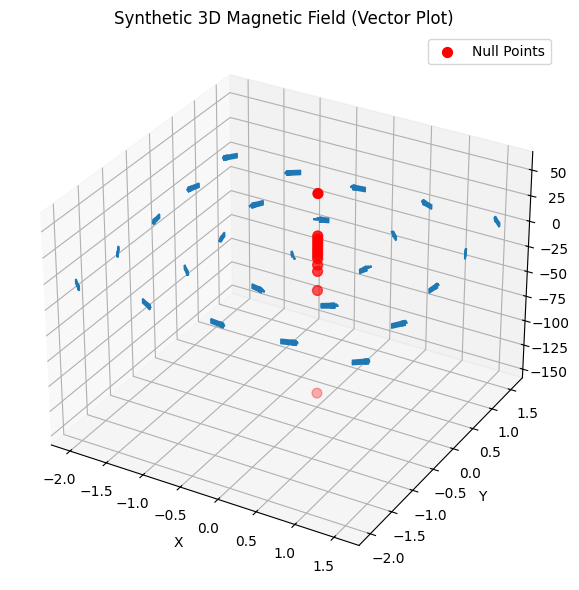

([array([[-0.        , -1.        , -0.        ],
         [ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        , -0.99999873]]),
  array([[ 0.        , -1.        ,  0.        ],
         [ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        , -0.99999873]]),
  array([[ 0., -1.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  0.,  1.]]),
  array([[ 0.        , -1.        ,  0.        ],
         [ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.99999468]]),
  array([[-0.        , -1.        , -0.        ],
         [ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        , -0.99998858]]),
  array([[ 0.        , -1.        ,  0.        ],
         [ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.99999493]]),
  array([[-0.        , -1.        , -0.        ],
         [ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.99999341]]),
  array(

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define a synthetic 3D vector field (imaginary magnetic field)
def B_field(x, y, z, t=0):
    """Imaginary time-dependent 3D magnetic field."""
    Bx = -y
    By = x
    Bz = np.sin(z + t)
    return np.array([Bx, By, Bz])

# Step 2: Create a grid
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(-2, 2, 10)
X, Y, Z = np.meshgrid(x, y, z)

# Step 3: Evaluate field on the grid at t=0
U = -Y
V = X
W = np.sin(Z)

# Step 4: Plot the vector field using quiver
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
skip = (slice(None, None, 2), slice(None, None, 2), slice(None, None, 2))
ax.quiver(X[skip], Y[skip], Z[skip], U[skip], V[skip], W[skip], length=0.2, normalize=True)
ax.set_title('Synthetic 3D Magnetic Field (Vector Plot)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()

# Step 5: Find null points using root finding in a local box
def find_null_points(f, bounds, num_attempts=100):
    null_points = []
    for _ in range(num_attempts):
        guess = np.random.uniform(bounds[0], bounds[1], 3)
        sol = root(lambda p: f(p[0], p[1], p[2]), guess)
        if sol.success and np.linalg.norm(f(*sol.x)) < 1e-3:
            point = np.round(sol.x, decimals=2)
            if not any(np.allclose(point, n, atol=0.1) for n in null_points):
                null_points.append(point)
    return np.array(null_points)

# Try to find null points in [-2, 2]^3 at t=0
nulls = find_null_points(lambda x, y, z: B_field(x, y, z, t=0), bounds=[-2, 2])

# Step 6: Plot null points
if nulls.size > 0:
    ax.scatter(nulls[:, 0], nulls[:, 1], nulls[:, 2], color='red', s=50, label='Null Points')
    ax.legend()

plt.show()

# Step 7: Compute Jacobian at null points
def compute_jacobian(f, x0, eps=1e-4):
    """Numerically compute the Jacobian matrix of f at x0."""
    x0 = np.asarray(x0)
    n = x0.size
    J = np.zeros((3, n))
    for i in range(n):
        dx = np.zeros_like(x0)
        dx[i] = eps
        f1 = f(*(x0 + dx))
        f2 = f(*(x0 - dx))
        J[:, i] = (f1 - f2) / (2 * eps)
    return J

# Analyze each null point
jacobians = []
eigenvalues = []
for point in nulls:
    J = compute_jacobian(lambda x, y, z: B_field(x, y, z, t=0), point)
    jacobians.append(J)
    eigenvalues.append(np.linalg.eigvals(J))

jacobians, eigenvalues


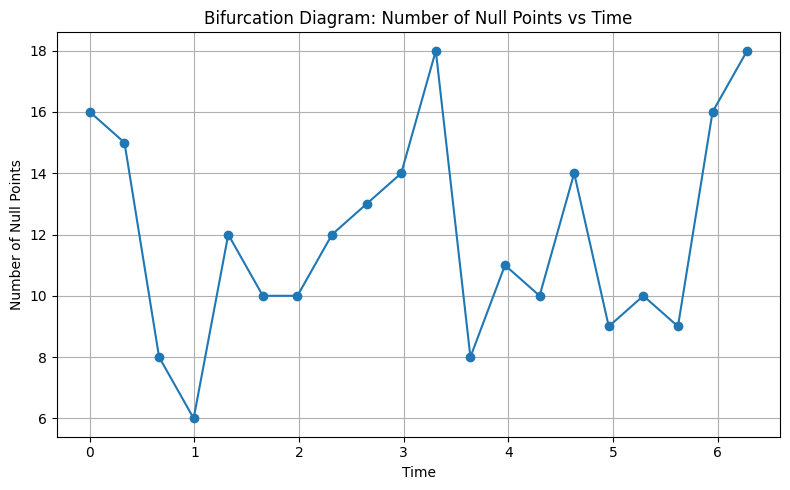

,time,x,y,z,eig1,eig2,eig3,type
0,0.0,0.0,0.0,0.00,0.0+1.0j,0.0-1.0j,1.000000+0.000000j,CCR
1,0.0,0.0,-0.0,3.14,0.0+1.0j,0.0-1.0j,-0.999999+0.000000j,CCR
2,0.0,0.0,0.0,-3.14,0.0+1.0j,0.0-1.0j,-0.999999+0.000000j,CCR
3,0.0,0.0,0.0,-12.57,0.0+1.0j,0.0-1.0j,0.999993+0.000000j,CCR
4,0.0,0.0,0.0,-9.42,0.0+1.0j,0.0-1.0j,-0.999989+0.000000j,CCR


from matplotlib import pyplot as plt
_df_0['z'].plot(kind='hist', bins=20, title='z')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7096: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


from matplotlib import pyplot as plt
_df_1['eig3'].plot(kind='hist', bins=20, title='eig3')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='z', y='eig3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['z']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('z')

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['eig3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('eig3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['x']
  ys = series['z']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('x', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('x')
_ = plt.ylabel('z')

from matplotlib import pyplot as plt
_df_7['z'].plot(kind='line', figsize=(8, 4), title='z')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


from matplotlib import pyplot as plt
_df_8['eig3'].plot(kind='line', figsize=(8, 4), title='eig3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['z'].plot(kind='hist', bins=20, title='z')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7096: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


from matplotlib import pyplot as plt
_df_11['eig3'].plot(kind='hist', bins=20, title='eig3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='index', y='z', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='z', y='eig3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['z']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('z')

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['eig3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('eig3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['z']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('z')

from matplotlib import pyplot as plt
_df_18['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['z'].plot(kind='line', figsize=(8, 4), title='z')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


from matplotlib import pyplot as plt
_df_20['eig3'].plot(kind='line', figsize=(8, 4), title='eig3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd

# Step 8: Loop over multiple time steps and track nulls and eigenvalues
time_steps = np.linspace(0, 2 * np.pi, 20)
null_data = []

for t in time_steps:
    # Find null points at current time step
    nulls_t = find_null_points(lambda x, y, z: B_field(x, y, z, t), bounds=[-2, 2], num_attempts=100)
    for point in nulls_t:
        J = compute_jacobian(lambda x, y, z: B_field(x, y, z, t), point)
        eigs = np.linalg.eigvals(J)
        eig_types = ''.join(['R' if np.isreal(e) else 'C' for e in eigs])  # Real or Complex
        null_data.append({
            "time": t,
            "x": point[0],
            "y": point[1],
            "z": point[2],
            "eig1": eigs[0],
            "eig2": eigs[1],
            "eig3": eigs[2],
            "type": eig_types
        })

# Step 9: Convert results to DataFrame
df_nulls = pd.DataFrame(null_data)

# Step 10: Count nulls per time step
bifurcation_summary = df_nulls.groupby("time").size().reset_index(name='null_count')

# Step 11: Plot bifurcation diagram (number of nulls vs time)
plt.figure(figsize=(8, 5))
plt.plot(bifurcation_summary["time"], bifurcation_summary["null_count"], marker='o', linestyle='-')
plt.title("Bifurcation Diagram: Number of Null Points vs Time")
plt.xlabel("Time")
plt.ylabel("Number of Null Points")
plt.grid(True)
plt.tight_layout()
plt.show()

df_nulls.head()


In [ ]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example synthetic 3D magnetic field (replace with your data)
def magnetic_field(x, y, z, k=1.0):
    Bx = x**3 - k*x  # Parameter 'k' controls bifurcation
    By = -y
    Bz = z
    return np.array([Bx, By, Bz])

In [ ]:
def find_null_points(k, initial_guesses):
    null_points = []
    for guess in initial_guesses:
        sol = root(lambda X: magnetic_field(X[0], X[1], X[2], k), guess)
        if sol.success:
            null_points.append(sol.x)
    return np.array(null_points)

# Initial guesses for root-finding (adjust based on your data)
initial_guesses = [
    [0.1, 0.1, 0.1],
    [-0.1, -0.1, -0.1],
    [1.5, 0.0, 0.0],
    [-1.5, 0.0, 0.0]
]

k = 1.0  # Default parameter
null_points = find_null_points(k, initial_guesses)
print("Null points:", null_points)

Null points: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]
 [-1.  0.  0.]]


In [ ]:
def jacobian(x, y, z, k):
    # Jacobian of the magnetic field
    return np.array([
        [3*x**2 - k, 0, 0],  # dBx/dx, dBx/dy, dBx/dz
        [0, -1, 0],           # dBy/dx, dBy/dy, dBy/dz
        [0, 0, 1]              # dBz/dx, dBz/dy, dBz/dz
    ])

for point in null_points:
    J = jacobian(*point, k)
    eigenvalues = np.linalg.eigvals(J)
    print(f"Null point {point}: Eigenvalues = {eigenvalues}")

Null point [0. 0. 0.]: Eigenvalues = [-1. -1.  1.]
Null point [0. 0. 0.]: Eigenvalues = [-1. -1.  1.]
Null point [1. 0. 0.]: Eigenvalues = [ 2. -1.  1.]
Null point [-1.  0.  0.]: Eigenvalues = [ 2. -1.  1.]


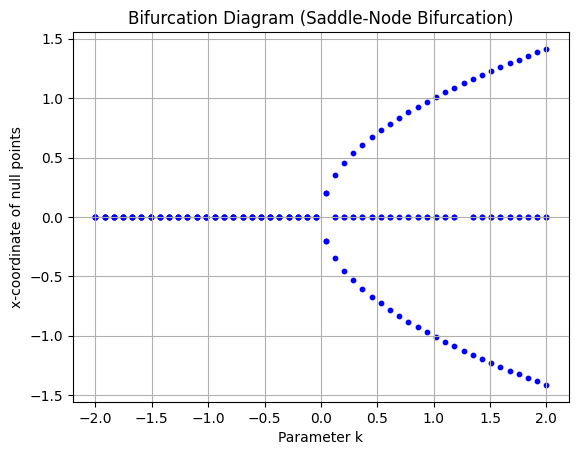

In [ ]:
k_values = np.linspace(-2, 2, 50)
null_points_history = []

for k in k_values:
    points = find_null_points(k, initial_guesses)
    null_points_history.append((k, points))

# Plot bifurcation diagram
plt.figure()
for i, (k, points) in enumerate(null_points_history):
    if len(points) > 0:
        plt.scatter([k]*len(points), [p[0] for p in points], c='b', s=10)
plt.xlabel("Parameter k")
plt.ylabel("x-coordinate of null points")
plt.title("Bifurcation Diagram (Saddle-Node Bifurcation)")
plt.grid()
plt.show()

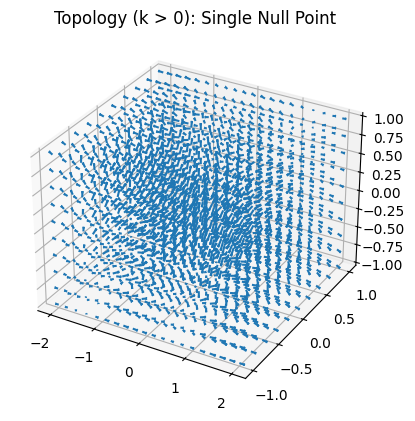

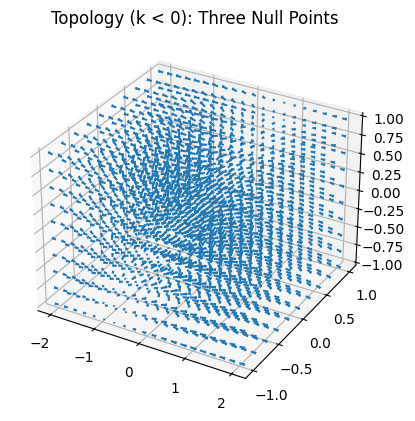

In [ ]:
def plot_field(k, title):
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-1, 1, 10)
    z = np.linspace(-1, 1, 10)
    X, Y, Z = np.meshgrid(x, y, z)

    Bx, By, Bz = magnetic_field(X, Y, Z, k)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(X, Y, Z, Bx, By, Bz, length=0.1, normalize=True)
    ax.set_title(title)
    plt.show()

# Before bifurcation (k = 1.0)
plot_field(k=1.0, title="Topology (k > 0): Single Null Point")

# After bifurcation (k = -1.0)
plot_field(k=-1.0, title="Topology (k < 0): Three Null Points")